In [300]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
import matplotlib as mpl

In [301]:
font_path = 'C:/Windows/Fonts/times.ttf'
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 20

In [302]:
filepath = "C:/Users/singhy/Desktop/Chicago/Hurst/Inflation_2/Clean Data/Transition Rates/all_rates_2016_present.csv"
df = pd.read_csv(filepath)

In [303]:
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [304]:
select = ['Year', 'Month','date', 'ee_pol', 'ee_wage_1', 'ee_wage_2', 'ee_wage_3',
       'ee_wage_4']

ee = df[select]

In [305]:
ee = ee.dropna()

In [306]:
ee_pre = ee[(ee['Year'] >= 2015) & (ee['Year'] <= 2019)]

In [307]:
ee_pre = ee_pre.drop(columns=['Year', 'Month', 'date'])

In [308]:
ee_pre = ee_pre.mean().to_frame().T

In [309]:
ee_inf = ee[((ee['date'] >= '2021-07-01') ) & (ee['date'] <= '2022-12-01')]

ee_inf = ee_inf.drop(columns=['Year', 'Month', 'date'])

In [310]:
ee_inf = ee_inf.mean().to_frame().T

In [311]:
ee_final = ee_inf/ee_pre

In [312]:
ee_final = (ee_final-1)*100

In [313]:
ee_final

,ee_pol,ee_wage_1,ee_wage_2,ee_wage_3,ee_wage_4
0,7.097054,7.586325,5.610967,8.926519,7.45125


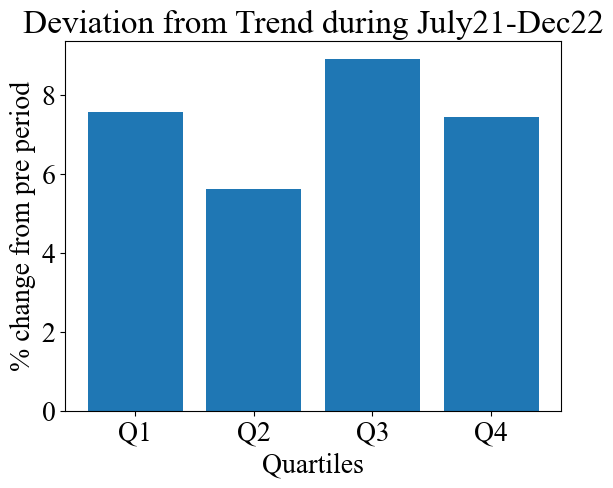

In [315]:
# Extracting the wage data for plotting
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
ee_wages = ee_final.iloc[0, 1:].values

# Plotting
plt.bar(quartiles, ee_wages)
plt.xlabel('Quartiles')
plt.ylabel('% change from pre period')
plt.title('Deviation from Trend during July21-Dec22')
plt.show()

# CPS ASEC Sample 

In [316]:
filepath = "C:/Users/singhy/Dropbox (BFI)/Labor_Market_PT/output/cps/job_flows.csv"
df = pd.read_csv(filepath)

In [317]:
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [318]:
select = ['Year', 'Month','date', 'ee_pol', 'ee_wage_1', 'ee_wage_2', 'ee_wage_3',
       'ee_wage_4', 'ee_wage_5', 'ee_wage_6', 'ee_wage_7', 'ee_wage_8',
       'ee_wage_9', 'ee_wage_10']

ee = df[select]

In [319]:
ee = ee.dropna()

In [320]:
ee_pre = ee[(ee['Year'] >= 2015) & (ee['Year'] <= 2019)]

In [321]:
ee_pre = ee_pre.drop(columns=['Year', 'Month', 'date'])

In [322]:
ee_pre = ee_pre.mean().to_frame().T

In [323]:
ee_pre

,ee_pol,ee_wage_1,ee_wage_2,ee_wage_3,ee_wage_4,ee_wage_5,ee_wage_6,ee_wage_7,ee_wage_8,ee_wage_9,ee_wage_10
0,0.013226,0.01798,0.016829,0.017613,0.015547,0.015389,0.014061,0.013699,0.012558,0.013233,0.012899


In [324]:
#ee_inf = ee[((ee['date'] > '2021-08-01') ) & (ee['date'] <= '2022-12-01')]
#ee_inf = ee[ee['Year'] == 2022]
ee_inf = ee[ee['date'] > '2021-07-01']
ee_inf = ee_inf.drop(columns=['Year', 'Month', 'date'])

In [325]:
ee_inf = ee_inf.mean().to_frame().T

In [326]:
ee_final = ee_inf/ee_pre

In [327]:
ee_final = (ee_final-1)*100

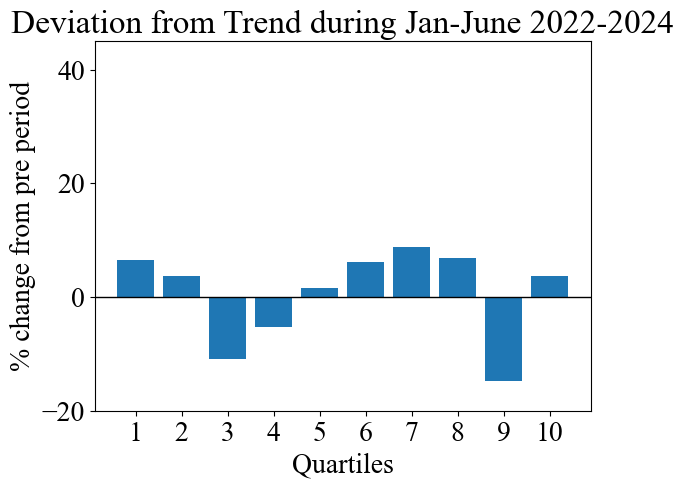

In [330]:
# Extracting the wage data for plotting
quartiles = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
ee_wages = ee_final.iloc[0, 1:].values

# Plotting
plt.bar(quartiles, ee_wages)
plt.xlabel('Quartiles')
plt.ylabel('% change from pre period')
plt.title('Deviation from Trend during Jan-June 2022-2024')
plt.axhline(y=0,color='black', linewidth=1)
plt.ylim(-20,45)
plt.show()